<a href="https://colab.research.google.com/github/hugosimasalmeida/sars-cov2-python/blob/master/Copy_of_Covid_19_Calculos_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O modelo SEIR é um modelo matemático que descreve a evolução de uma doença infecciosa com base na transição dos individuos de uma população em quatro variáveis:
Sucetíveis: Indivíduos sem imunidade à doença e ainda não infectados
Expostos: Indivídos já infectados porém em fase de incubação e portanto ainda não totalmente
Infecciosos: Portadores e garantidamente transmissores
Recuperados: Individuos recuperados e imunes.

**Parâmetros:**
γ - Taxa de recuperação = 1/Duração média da doença σ - Taxa de incubação = 1/periodo médio de incubação β - Taxa de Infecção = razão de disseminação da doença, no código abaixo modelada como Contatos Por dia multiplicado pela possibilidade de um contato transmitir a infecção.

**Modelo:**
O modelo é dado pelas equações diferenciais do modelo SEIR sem dinâmicas vitais (i.e., assumindo uma população constante, conforme encontradas em http://idmod.org/docs/hiv/model-seir.html#seir-without-vital-dynamics)
eq.png

Resultado:

O resultado é um gráfico que se apresenta é uma estimativa desde o dia de hoje 1/4/2020, para um periodo de 60 dias a evolução das quatro quantidades modeladas pelo SEIR, bem como uma projeção do numero de hospitalizações e internações de acordo com os ultimos numeros do ministerio de sanidad em Espanha. (atençäo que devido á falta de testes rápidos a toda a populaçäo os modelos de epidemologia säo altamente faliveis e deveria ser investido o máximo de esforço nesses testes dado o impacto na economia que representa nao poder suavizar as medidas sem controlar a doença).




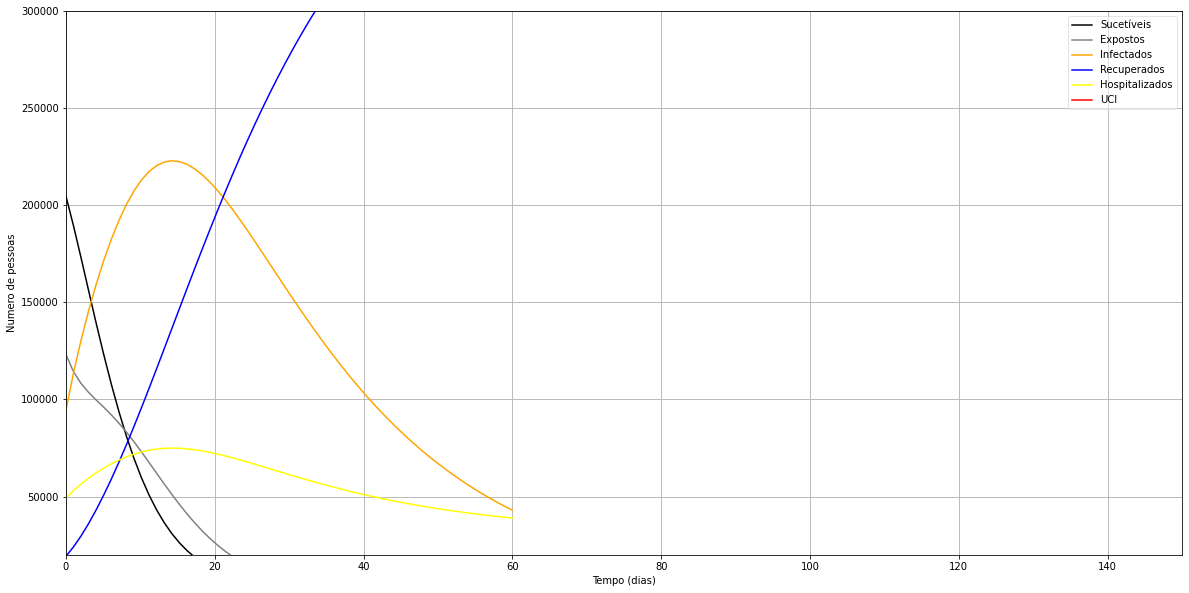

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# população Espanha Susceptivel (estimativa en base a un 4% de fallecidos --> fallecidos / 0,04)
N = 204725
#infectados iniciais (dados ministerio sanidad a 1/4/2020)
I0 = 94417
#recuperados iniciais (devem ser mais do que os reportados pelos assintomaticos)
R0 = 19259
#sucetíveis iniciais
S0 = N
# expostos iniciais - não contagiosos ainda (em media 40% sao hospitaliz. em Espanha ie 49243 /,4 a 1 /4/2020)
E0 = 123108
contatos_dia = 3
prob_contato = 0.05 #probabilidade de um contato transmitir a infecção, número assumido arbitrariamente como 5%
#razão de contato
beta = contatos_dia * prob_contato
#razão de recuperação média
gamma = 1/22 # assumir recuperação em 22 dias

hospitalizados = 49243
internados_uti = 2833
# 200 evenly spaced values (representing days)
t = np.linspace(0, 60, 60)

sigma = 1/5

ySeir0 = S0, I0, R0, E0, hospitalizados, internados_uti
def func_seir_model(ySeir0, t, N):
    S, I, R, E, hospitalizados, internados_uti = ySeir0
    dSdt = -(beta * S * I / N) 
    dEdt = beta * S * I /N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I 
    hospitalizados = dIdt * 0.2 #
    internados_uti = dIdt * 0.05
    return dSdt, dIdt, dRdt, dEdt, hospitalizados, internados_uti
    

#for beta_val in beta_values:
# Integrate the diff eqs over the time array
values = odeint(func_seir_model, ySeir0, t, args=(N,))
# assign S, I, R values from values transpose
S, I, R, E, hospitalizados, internados_uti = values.T
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'black', lw=1.5, label='Sucetíveis')
ax.plot(t, E, 'gray', lw=1.5, label='Expostos')
ax.plot(t, I, 'orange', lw=1.5, label='Infectados')
ax.plot(t, R, 'blue', lw=1.5, label='Recuperados')
ax.plot(t, hospitalizados, 'yellow', lw=1.5, label='Hospitalizados')
ax.plot(t, internados_uti, 'red', lw=1.5, label='UCI')
ax.set_xlabel('Tempo (dias)')
ax.set_ylabel('Numero de pessoas')
ax.set_ylim(20000,300000)
ax.set_xlim(0,150)
ax.grid(b=True, which='major', c='#bbbbbb', lw=1, ls='-')        
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

A variável mais sensivel aqui é a populaçäo susceptivel e daí as medidas de contençäo. Se mudarmos isto para cima de 1 milhao de pessoas susceptiveis nao é possivel reduzir o tempo de recuperaçäo da normal actividade e seria interessante equacionar medidas de contencao aos mais idosos e mais frágeis porque o impacto economico pode extender-se ao longo do tempo. O número assumivel seria 200 e tal mil de infectados reais (assitomáticos mais sintomáticos) mas, parece que existem várias investigacoes que apontam para números para todos os gostos e a confirmar-se este pessimo cenário haverá sem duvida uma pressao impossivel sobre o sistema hospitalar dentro de 10 dias que será provavelmente o pico de contagiados cuja progressao já nao deverá ser os 20 a 25% habituais diários mas, menos do que os recuperados que esperemos que atinjam uma taxa de progressao de 10% diária. 